
# MTHM008 Project 1 

700024338

## Introduction
This project investigates two systems of ordainary differential equations (ODE) (Lotka-Volterra predator-prey model and Lorenz's 1963 system). Exact solutions of dynamical ODE's are dificult to solve, however, by using mathematical models, we can easily alter parameters and conditions in order to visualise the behaviour of such systems and understand the implications of numerical solutions.

The first system looks at the popular predator-prey model. In the early 1900's, Lokta and Volterra independently considered the simplified two species interaction and concluded the populations would theoretically oscillate[]. The system ignores aspects such as disease or competition so each species would control the population of the other in a cyclical manner. From approximately 50 years of detailed records of pelt by the Hudson’s Bay Company, the abundance of snowshoe hares and Canadian lynx showed nearly periodic oscillation. With the assumption that wild numbers were proportional to trapped amounts, here we use the Lokta-Volterra equations to mathematically model this data and conduct numerical analysis to examine the systems stability.

## - Lotka-Volterra Model

- Analyse the stability of equilibrium points
- Discretise the model using a finite difference method
- Investigate the behaviour of the model when a third species is introduced

###  2 Species Model

\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= \delta H L - \gamma L \; ,
\end{align*}
where $H$ and $L$ represent the number of hare and lynx respectively, and $\alpha$, $\beta$, $\gamma$ and $\delta$ are positive real parameters.



### Finding Equilibrium Points and Analysing System's Stability 
Equilibrium points are steady states that are a constant solution to an ODE. We will find $P_{0}$ and determine whether the eqilibrium point is stable by finding eigenvalues of the Jacobian Matrix. 
 - Finding Equilibrium points\
 \
Let's set our system of ODE as:
\
\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L\ &= F(H,L) \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= \delta H L - \gamma L\ &= G(H,L) \; ,
\end{align*}
\
From this, an equilibrium point is a point $P_{0}$ $=$ ($H_{0}$ ,$L_{0}$) for which:\
\
\begin{align*}
F (H_{0} ,L_{0}) = 0\;,\\
G (H_{0} ,L_{0}) = 0\;,
\end{align*}
\
An explicit solution is $P_{0,1}$ $=$ $(0,0)$\
Rearranging $F $ and $G$, we can find our second solution by making the values within the brackets $=0$:
\
\begin{align*}
H(\alpha - \beta L) = 0 \rightarrow \alpha - \beta L = 0\;,\\
L(\delta H - \gamma) = 0 \rightarrow \delta H - \gamma = 0 \;,
\end{align*}
\
Hence, $P_{0,2}$ = $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ is also a solution.

 - Test the local stability at each fixed point\
 \
The system's stability is interpreted by linearising the non-linear system near an equilibrium. This perturbation will allow us to understand the behaviour of the system local to these points such as if it were to move away or remain at a steady state.\
\
We set our perturbed points to be: H(t) = $H_{0}$ + $\theta$ and L(t) = $L_{0}$ + $\phi$, where $\theta$ and $\phi$ are small perturbations from a fixed point. Linearising F and G about these points usinf Taylor expansion, we have:\
\
\begin{align*}
\frac{\partial \theta}{\partial t} &= F(H_{0} + \theta,L_{0} + \phi) ,\\
&= F(H_{0} ,L_{0}) + \theta \displaystyle \Bigg[ \frac{\partial F}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial F}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ... \; ,\\
&= \theta \displaystyle \Bigg[ \frac{\partial F}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial F}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ...
\\
\\
\frac{\partial \phi}{\partial t} &= G(H_{0} + \theta,L_{0} + \phi),\\
&= G(H_{0} ,L_{0}) + \theta \displaystyle \Bigg[ \frac{\partial G}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial G}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ... \; ,\\
&= \theta \displaystyle \Bigg[ \frac{\partial G}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial G}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ...\\
\\
\end{align*}
\
Higher-order terms in the taylor series for perturbations, $\theta$ & $\phi$ that are close to 0, can be neglected. This system of perturbation ODE can be written as a Jacobian Matrix, $\boldsymbol A$ :\
\
\begin{align*}
\boldsymbol{u} &= \begin{bmatrix} \theta \\ \phi \end{bmatrix} \; ,\\
\\
\frac{\partial \boldsymbol{u}}{\partial t} &= \begin{bmatrix} \displaystyle \Bigg( \frac{\partial F}{\partial H}\Bigg)_{(H_{0} ,L_{0})}& \displaystyle \Bigg( \frac{\partial F}{\partial L}\Bigg)_{(H_{0} ,L_{0})} \\ \displaystyle \Bigg( \frac{\partial G}{\partial H}\Bigg)_{(H_{0} ,L_{0})}&\displaystyle \Bigg( \frac{\partial G}{\partial L}\Bigg)_{(H_{0} ,L_{0})} \end{bmatrix} \cdot \boldsymbol{u} \; ,\\
&= \boldsymbol {A} \boldsymbol{u}\\
\\
\end{align*}
\
Hence, by finding the partial derivatives of functions $F(H,L)$ and $G(H,L)$ , we have:\
\
\begin{align*}
\boldsymbol {A} &= \begin{bmatrix} \alpha - \beta L & - \beta H \\ \delta L & \delta H - \gamma \end{bmatrix}
\end{align*} \
From the eigenvalue equation , $\boldsymbol{A}$ $\boldsymbol{x}$ = $\lambda$ $\boldsymbol{x}$ , eigenvalues ,$\lambda$ , are found to be the roots of the polynomial that forms when evaluating the characteristic equation at $P_{0,1}$ & $P_{0,2}$ which is:\
\
\begin{align*}
det[\boldsymbol{A} - \lambda \boldsymbol{I}] = 0 ,  \quad \boldsymbol{I}=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\end{align*} 
    - at $P_{0,1}$ $=(0,0)$:\
\begin{align}
det[\boldsymbol{A} - \lambda \boldsymbol{I}] = det \begin{bmatrix} \alpha - \lambda & 0 \\ 0 & - \gamma - \lambda \end{bmatrix} 
&= (\alpha - \lambda) \cdot (- \gamma - \lambda ) = 0 ,\\
\end{align}
\
Eigenvalues $\rightarrow  \lambda_{1} = \alpha , \lambda_{2} = - \gamma$ \
\
$\lambda_{1} , \lambda_{2} \; \epsilon \; \mathbb{R}$\
$\lambda_{1} > 0 , \lambda_{2} < 0 $ \
\
The eigenvalues are real and of opposite signs which result into an **unstable** saddle point
    - at $P_{0,2}$ = $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$:\
\begin{align}
det[\boldsymbol{A} - \lambda \boldsymbol{I}] = det \begin{bmatrix} 0 - \lambda & - \frac{\beta \gamma}{\delta} \\ \frac{\delta \alpha}{\beta} & 0 - \lambda \end{bmatrix}
= (- \lambda) \cdot ( - \lambda ) - (- \frac{\beta \gamma}{\delta}) \cdot (\frac{\delta \alpha}{\beta}) ,
&= \lambda^{2} + \gamma \alpha  =0
\end{align}  
\
Eigenvalues $\rightarrow  \lambda_{1} = \sqrt{\gamma \alpha}$ $\boldsymbol{i}$ , $\lambda_{2} = - \sqrt{\gamma \alpha}$ $\boldsymbol{i} $ \
\
$\lambda_{1} , \lambda_{2} \; \epsilon \; \mathbb{C}$\
$\lambda_{1}$ & $\lambda_{2}$ are complex conjugates \
\
The eigenvalues are complex conjugates with no real values which result into an **stable** cyclical oscillation.

### Discretising the Model

Another method to find an approximate solution for a system of differntial equations is by using a finite difference method, more specifically the Forward Euler method.

Given an ODE of the form 

\begin{equation}
\frac{d{\bf{y}}}{dt} = {\bf{f}}({\bf{y}}), \quad t\ge t_0, \quad {\bf{y}}(t_0)={\bf{y}}_0
\end{equation}

The domain is first discretised into a finite number of points that are evenly distributed: $t_1, t_2, ..., t_n$.

Integrating the ODE between $t_i$ and $t_{i+1}$ gives
\begin{align}
{\bf{y}}(t_{i+1}) &= {\bf{y}}(t_i) + \int_{t_i}^{t_{i+1}}{\bf{f}}({\bf{y}}(\tau)) d\tau \\
&\approx {\bf{y}}(t_i) + (t_{i+1}-t_i){\bf{f}}({\bf{y}}_i) \\
&= {\bf{y}}(t_i) + \Delta t{\bf{f}}({\bf{y}}_i)
\end{align}
where $\Delta t$ is the (constant) distance between $t_i$ and $t_{i+1}$.

This solution approximates the model to be piecewise linear so it is clear that the smaller the domain is discretised the closer our approximation will be to the true analytical solution.

We will now formulate a recursive algorithm that is applied to the Lokta-Volterra model.  The method for this will be to:

1. initialise H, L, the model parameters $\alpha$, $\beta$, $\gamma$ and $\delta$, the start time $t_0$, the timestep $\Delta t$ and an end time $t_{max}$

2. write a loop to update the values according to:
\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_i L_i - \gamma L_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}

3. plot the data

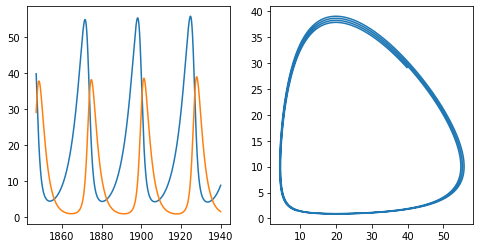

In [89]:
import matplotlib.pyplot as plt
from cw1_functions import forward_euler2, forward_euler3
'''
forward_euler2 function returns np.array of (hare, lynx, time) data and can be called 
as x[0], x[1], x[2] repectively when x=forward_euler(...).

    Parameters for the model - a,b,d,g are aplha, beta, delta, gamma respectively.
    t : start time
    t_max: maximum runtime 
    Del_t: constant timestep
    Hi: initial hare population
    Li: initial lynx population
'''
x1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
hare1 = x1[0]
lynx1 = x1[1]
time1 = x1[2]

#Plotting the time evolution of hare and lynx populations using forward Euler method.
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes2[0].plot(time1, hare1)
axes2[0].plot(time1, lynx1)
axes2[1].plot(hare1, lynx1)


Varying Parameters

In [168]:
a1=forward_euler2(a=0.1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
a2=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
a3=forward_euler2(a=0.4,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#predatation paradox 
b1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
b2=forward_euler2(a=0.2,b=0.04,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
b3=forward_euler2(a=0.2,b=0.08,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

d1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
d2=forward_euler2(a=0.2,b=0.02,d=0.04,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
d3=forward_euler2(a=0.2,b=0.02,d=0.06,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

g1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
g2=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.6,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
g3=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.8,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

v_a=[a1,a2,a3]
v_b=[b1,b2,b3]
v_d=[d1,d2,d3]
v_g=[g1,g2,g3]

l_a=['a=0.1','a=0.2','a=0.4']
l_b=['b=0.02','b=0.04','b=0.08']
l_d=['d=0.02','d=0.04','d=0.06']
l_g=['g=0.4','g=0.6','g=0.8']


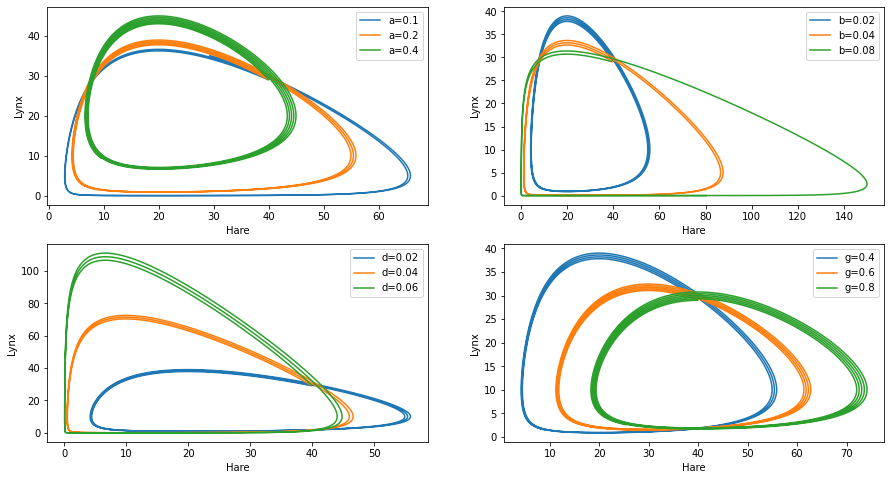

In [169]:
fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))  # defining the figure and subplots
axes1 = axes1.ravel()  # array to 1D
cols1 = [v_a,v_b,v_d,v_g]
labels = [l_a,l_b,l_d,l_g]
for col, ax, l in zip(cols1, axes1,labels):
    ax.plot(col[0][0],col[0][1], label = l[0])
    ax.plot(col[1][0],col[1][1], label = l[1])
    ax.plot(col[2][0],col[2][1], label = l[2])
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')
    ax.legend()


Eigenvalue Analysis


In [36]:
x2=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=0.4/0.02 ,Li=0.2/0.02)
x4=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=0.4/0.02 +0.01,Li=0.2/0.02+0.01)
x5=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=0.4/0.02 +1,Li=0.2/0.02+1)
x6=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=0.4/0.02 +10,Li=0.2/0.02+10)

x3=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=0 ,Li=0)
x7=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=0.01,Li=0.01)
x8=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=1,Li=1)
x9=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=10,Li=10)

po2=[x2,x4,x5,x6]
po1=[x3,x7,x8,x9]

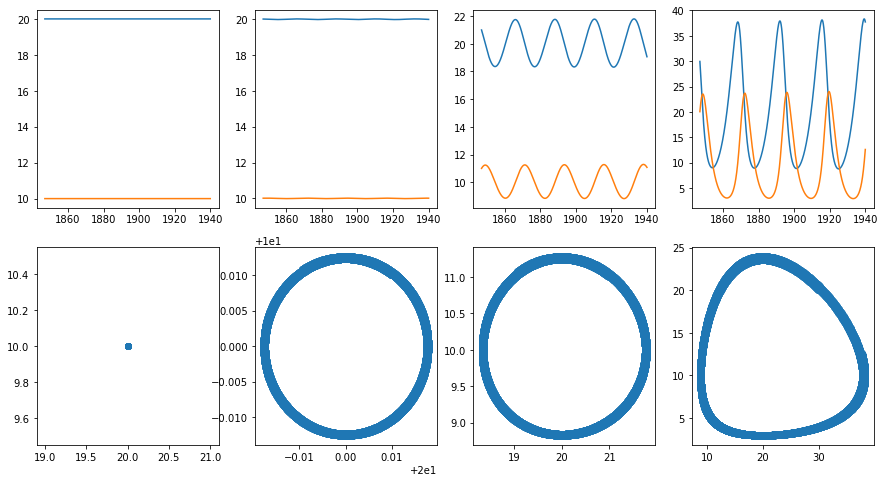

In [37]:
fig1, axes1 = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))  # defining the figure and subplots
axes1 = axes1.ravel()  # array to 1D
cols1 = po2  # (4,3,9301) shaped array of (hare, lynx, time) data from points equal or close to P_0,2. 
for col, ax in zip(cols1, axes1[0:4]):
    ax.plot(col[2],col[0])
    ax.plot(col[2],col[1])
for col, ax in zip(cols1, axes1[4:8]):
    ax.scatter(col[0],col[1])


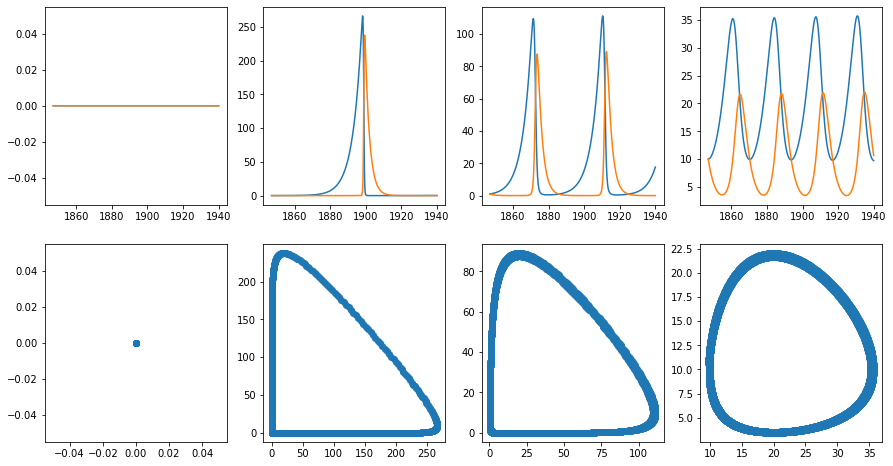

In [35]:
fig1, axes1 = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))  # defining the figure and subplots
axes1 = axes1.ravel()  # array to 1D
cols1 = po1  # (4,3,9301) shaped array of (hare, lynx, time) data from points equal or close to P_0,1. 
for col, ax in zip(cols1, axes1[0:4]):
    ax.plot(col[2],col[0])
    ax.plot(col[2],col[1])
for col, ax in zip(cols1, axes1[4:8]):
    ax.scatter(col[0],col[1])


Modified Euler method

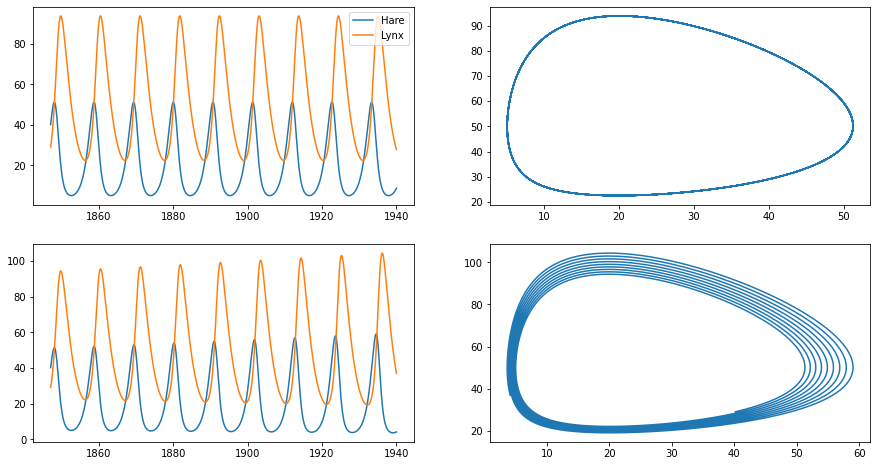

In [16]:
x1=modforward_euler2(a=1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
hare1 = x1[0]
lynx1 = x1[1]
time1 = x1[2]
x2=forward_euler2(a=1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
hare2 = x2[0]
lynx2 = x2[1]
time2 = x2[2]

#Plotting the time evolution of hare and lynx populations and phase diagrams.
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axes2[0,0].plot(time1, hare1, label ='Hare')
axes2[0,0].plot(time1, lynx1, label ='Lynx')
axes2[0,1].plot(hare1, lynx1)
axes2[1,0].plot(time2, hare2)
axes2[1,0].plot(time2, lynx2)
axes2[1,1].plot(hare2, lynx2)
axes2[0,0].legend()

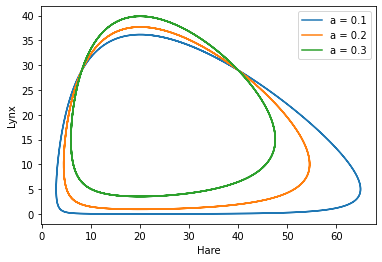

In [78]:
x1=modforward_euler2(a=0.1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
x2=modforward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
x3=modforward_euler2(a=0.3,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

plt.plot(x1[0],x1[1], label = 'a = 0.1')
plt.plot(x2[0],x2[1], label = 'a = 0.2')
plt.plot(x3[0],x3[1], label = 'a = 0.3')
plt.xlabel('Hare')
plt.ylabel('Lynx')
plt.legend()

###  3 Species Model
\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= +\delta H L - \gamma L - \epsilon L W \; ,\\
\frac{\mathrm{d} W}{\mathrm{d} t} &= -\eta W + \rho L W \; ,
\end{align*}
where $H$, $L$ and $W$ represent the number of hare, lynx and wolf respectively, and $\alpha$, $\beta$, $\gamma$, $\delta$, $\epsilon$, $\eta$ and $\rho$ are positive real parameters.

Forward Euler
\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_i L_i - \gamma L_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}


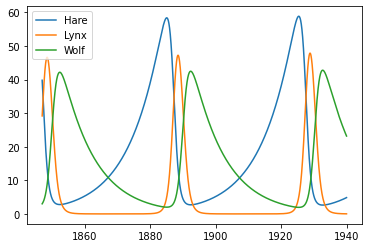

In [146]:
 import numpy as np
    
"""
Forward euler method for Lokta-Volterra Model 3 species
    Parameters for the model - a,b,d,g,ep,et,r are aplha, beta, delta, gamma, epsilon, eta, rho respectively.
    t : start time
    t_max: maximum runtime 
    Del_t: constant timestep
    Hi: initial hare population
    Li: initial lynx population
    Wi: initial wolf population
Returns an array of [hare, lynx, wolf, time]
"""
 
y=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

#Plotting the time evolution of hare and lynx populations using forward Euler method.

plt.plot(y[3], y[0], label ='Hare')
plt.plot(y[3], y[1], label ='Lynx')
plt.plot(y[3], y[2], label ='Wolf')
plt.legend()



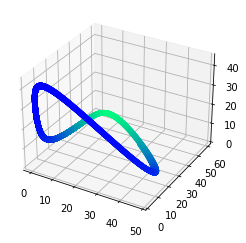

In [96]:
axes22 = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = wolf1
xline = lynx1
yline = hare1
axes22.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = wolf1
xdata = lynx1
ydata = hare1
axes22.scatter3D(xdata, ydata, zdata, c=ydata, cmap='winter');

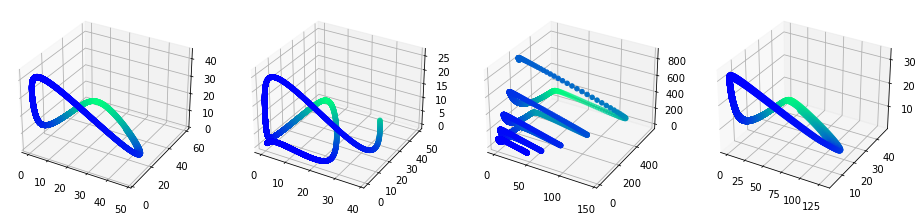

In [162]:
#reference
y1=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#double beta
y2=forward_euler3(a=0.1,b=0.04,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#double rho
y3=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.04,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#5 times increase of delta and gamma
y4=forward_euler3(a=0.1,b=0.02,d=0.1,g=0.5,ep=0.1,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

fig = plt.figure(figsize=plt.figaspect(.25))
ax1 = fig.add_subplot(1, 4, 1,projection='3d')
zline = y1[2]
xline = y1[1]
yline = y1[0]
ax1.plot3D(xline, yline, zline, 'gray')
zdata = y1[2]
xdata = y1[1]
ydata = y1[0]
ax1.scatter3D(xdata, ydata, zdata, c=ydata, cmap='winter');

ax2 = fig.add_subplot(1, 4, 2,projection='3d')
zline = y2[2]
xline = y2[1]
yline = y2[0]
ax2.plot3D(xline, yline, zline, 'gray')
zdata = y2[2]
xdata = y2[1]
ydata = y2[0]
ax2.scatter3D(xdata, ydata, zdata, c=ydata, cmap='winter');

ax3 = fig.add_subplot(1, 4, 3,projection='3d')
zline = y3[2]
xline = y3[1]
yline = y3[0]
ax3.plot3D(xline, yline, zline, 'gray')
zdata = y3[2]
xdata = y3[1]
ydata = y3[0]
ax3.scatter3D(xdata, ydata, zdata, c=ydata, cmap='winter');

ax4 = fig.add_subplot(1, 4, 4,projection='3d')
zline = y4[2]
xline = y4[1]
yline = y4[0]
ax4.plot3D(xline, yline, zline, 'gray')
zdata = y4[2]
xdata = y4[1]
ydata = y4[0]
ax4.scatter3D(xdata, ydata, zdata, c=ydata, cmap='winter');

Modified Euler
\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_{i+1} L_i - \gamma L_i - \epsilon L_i W_i) \\
  W_{i+1} &= W_i + \Delta t (-\eta W_i + \rho L_{i+1} W_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}


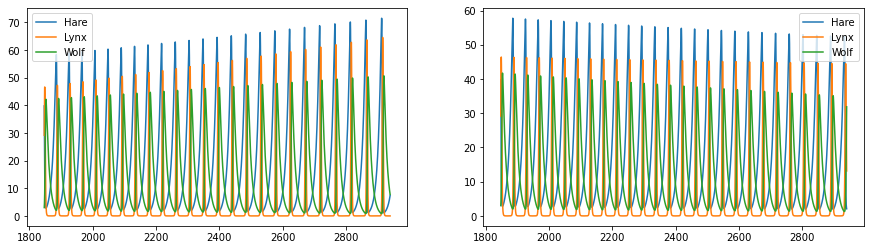

In [143]:
y1=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=2940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

y2=modforward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=2940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))  # defining the figure and subplots
axes1 = axes1.ravel()  # array to 1D
three_mod_comp =[y1,y2] 
for col, ax in zip(three_mod_comp, axes1):
    ax.plot(col[3],col[0],label ='Hare')
    ax.plot(col[3],col[1],label ='Lynx')
    ax.plot(col[3],col[2],label ='Wolf')
    ax.legend()



## - Lorenz Model
- Finding solutions to the Lorenz model
- Sensitivity of model to initial conditions and model parameters
- Exploring predictability and growth rates
- Modelling ENSO